In [1]:
# Importing libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Creating dataframe of the data

df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset3/main/Salaries.csv')
df

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500
...,...,...,...,...,...,...
392,Prof,A,33,30,Male,103106
393,Prof,A,31,19,Male,150564
394,Prof,A,42,25,Male,101738
395,Prof,A,25,15,Male,95329


In [4]:
df.shape

(397, 6)

In [5]:
df.columns

Index(['rank', 'discipline', 'yrs.since.phd', 'yrs.service', 'sex', 'salary'], dtype='object')

In [6]:
df.dtypes

rank             object
discipline       object
yrs.since.phd     int64
yrs.service       int64
sex              object
salary            int64
dtype: object

##### Encoding categorical inputs

In [7]:
le = LabelEncoder()
list1 = ['rank', 'discipline', 'sex']
for i in list1:
    df[i] = le.fit_transform(df[i].astype(str))

In [8]:
df

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,2,1,19,18,1,139750
1,2,1,20,16,1,173200
2,1,1,4,3,1,79750
3,2,1,45,39,1,115000
4,2,1,40,41,1,141500
...,...,...,...,...,...,...
392,2,0,33,30,1,103106
393,2,0,31,19,1,150564
394,2,0,42,25,1,101738
395,2,0,25,15,1,95329


In [9]:
df.isnull().sum()

rank             0
discipline       0
yrs.since.phd    0
yrs.service      0
sex              0
salary           0
dtype: int64

In [10]:
df.describe()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
count,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000
mean,1.508816,0.544081,22.314861,17.614610,0.901763,113706.458438
std,0.757486,0.498682,12.887003,13.006024,0.298010,30289.038695
min,0.000000,0.000000,1.000000,0.000000,0.000000,57800.000000
25%,1.000000,0.000000,12.000000,7.000000,1.000000,91000.000000
50%,2.000000,1.000000,21.000000,16.000000,1.000000,107300.000000
75%,2.000000,1.000000,32.000000,27.000000,1.000000,134185.000000
max,2.000000,1.000000,56.000000,60.000000,1.000000,231545.000000


In [11]:
df.skew()

rank            -1.151164
discipline      -0.177684
yrs.since.phd    0.300880
yrs.service      0.650569
sex             -2.709958
salary           0.714568
dtype: float64

In [12]:
df.corr()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
rank,1.000000,-0.086266,0.525500,0.447499,0.132492,0.522207
discipline,-0.086266,1.000000,-0.218087,-0.164599,0.003724,0.156084
yrs.since.phd,0.525500,-0.218087,1.000000,0.909649,0.148788,0.419231
yrs.service,0.447499,-0.164599,0.909649,1.000000,0.153740,0.334745
sex,0.132492,0.003724,0.148788,0.153740,1.000000,0.138610
salary,0.522207,0.156084,0.419231,0.334745,0.138610,1.000000


<AxesSubplot:>

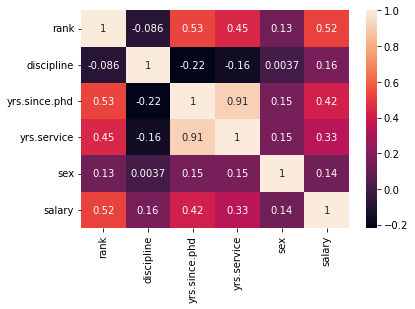

In [13]:
sns.heatmap(df.corr(), annot=True)

### Univariate Analysis

rank                AxesSubplot(0.125,0.536818;0.133621x0.343182)
discipline       AxesSubplot(0.285345,0.536818;0.133621x0.343182)
yrs.since.phd     AxesSubplot(0.44569,0.536818;0.133621x0.343182)
yrs.service      AxesSubplot(0.606034,0.536818;0.133621x0.343182)
sex              AxesSubplot(0.766379,0.536818;0.133621x0.343182)
salary                 AxesSubplot(0.125,0.125;0.133621x0.343182)
dtype: object

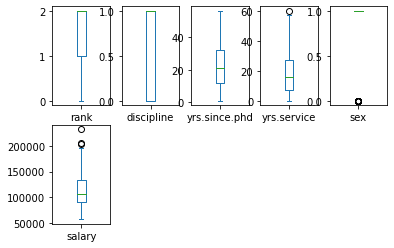

In [14]:
df.plot(kind='box', subplots=True, layout=(2, 5))

<AxesSubplot:xlabel='sex', ylabel='count'>

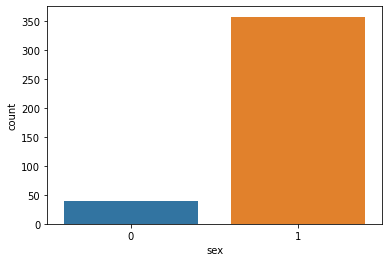

In [15]:
sns.countplot(df.sex)

<AxesSubplot:>

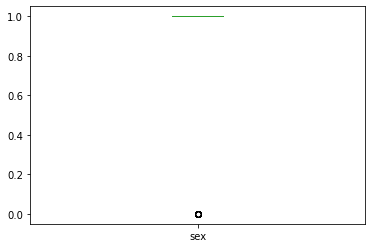

In [16]:
df.sex.plot.box()

<Figure size 432x288 with 0 Axes>

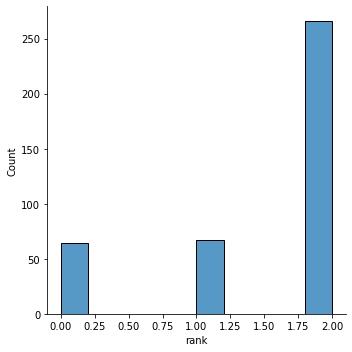

<Figure size 432x288 with 0 Axes>

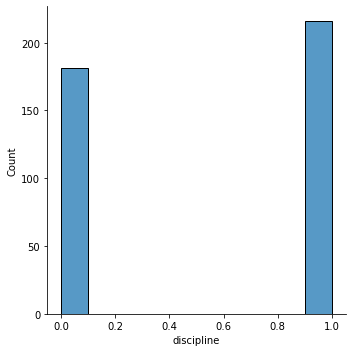

<Figure size 432x288 with 0 Axes>

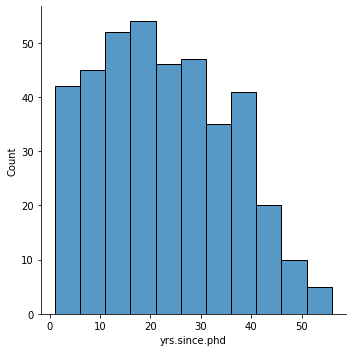

<Figure size 432x288 with 0 Axes>

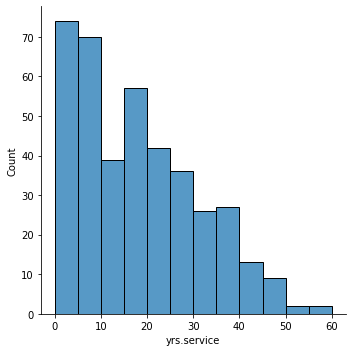

<Figure size 432x288 with 0 Axes>

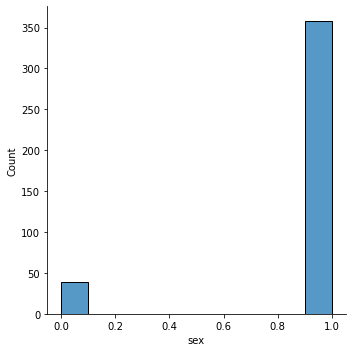

<Figure size 432x288 with 0 Axes>

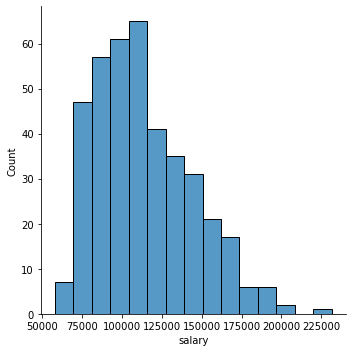

In [17]:
for i in df.columns:
    plt.figure()
    sns.displot(df[i])

### Bivariate Analysis

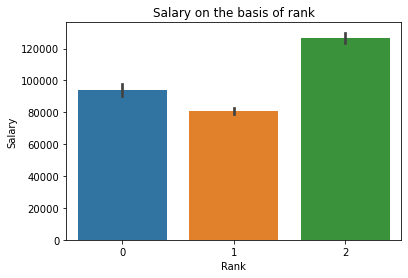

In [18]:
# rank and salary

sns.barplot(x=df['rank'], y=df['salary'])
plt.xlabel('Rank')
plt.ylabel('Salary')
plt.title('Salary on the basis of rank')
plt.show()

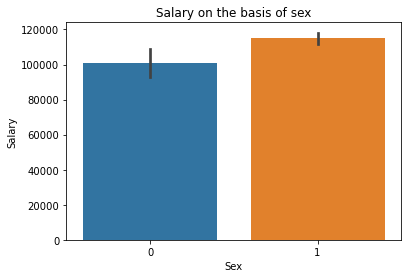

In [19]:
# sex and salary

sns.barplot(x=df['sex'], y=df['salary'])
plt.xlabel('Sex')
plt.ylabel('Salary')
plt.title('Salary on the basis of sex')
plt.show()

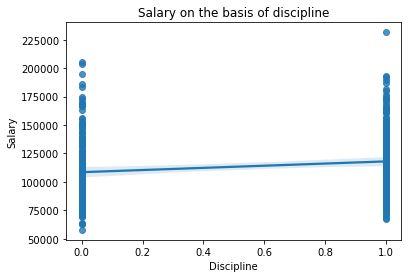

In [20]:
# salary and discipline

sns.regplot(df.discipline,df.salary,df)
plt.xlabel('Discipline')
plt.ylabel('Salary')
plt.title('Salary on the basis of discipline')
plt.show()

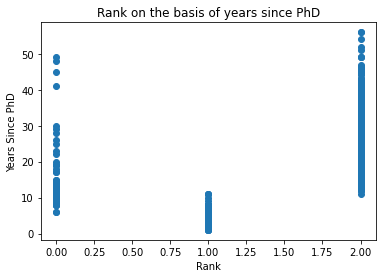

In [21]:
# rank and years since phd


plt.scatter(df['rank'],df['yrs.since.phd'])
plt.xlabel('Rank')
plt.ylabel('Years Since PhD')
plt.title('Rank on the basis of years since PhD')
plt.show()

### Removing outliers

rank                AxesSubplot(0.125,0.536818;0.168478x0.343182)
discipline       AxesSubplot(0.327174,0.536818;0.168478x0.343182)
yrs.since.phd    AxesSubplot(0.529348,0.536818;0.168478x0.343182)
yrs.service      AxesSubplot(0.731522,0.536818;0.168478x0.343182)
sex                    AxesSubplot(0.125,0.125;0.168478x0.343182)
salary              AxesSubplot(0.327174,0.125;0.168478x0.343182)
dtype: object

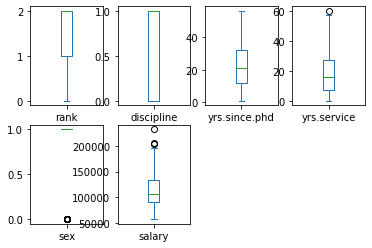

In [22]:
df.plot(kind='box', subplots=True, layout=(2, 4))

In [23]:
from scipy.stats import zscore

z = np.abs(zscore(df))

print(np.where(z > 3))

(array([  9,  19,  24,  34,  35,  43,  47,  48,  52,  63,  68,  84,  90,
       103, 114, 119, 123, 127, 131, 132, 133, 148, 153, 179, 186, 218,
       230, 231, 233, 237, 245, 253, 254, 274, 316, 323, 330, 332, 334,
       341, 358, 361, 364], dtype=int64), array([4, 4, 4, 4, 4, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4, 4, 4, 5],
      dtype=int64))


In [24]:
df.shape

(397, 6)

In [25]:
len(np.where(z > 3)[0])

43

In [26]:
df = df[(z<3).all(axis=1)]

In [27]:
df.shape

(354, 6)

### Testing and Training the model

In [29]:
x = df.iloc[:,:-1]
y = df.iloc[:, -1]

In [30]:
x

,rank,discipline,yrs.since.phd,yrs.service,sex
0,2,1,19,18,1
1,2,1,20,16,1
2,1,1,4,3,1
3,2,1,45,39,1
4,2,1,40,41,1
...,...,...,...,...,...
392,2,0,33,30,1
393,2,0,31,19,1
394,2,0,42,25,1
395,2,0,25,15,1


In [31]:
y

0      139750
1      173200
2       79750
3      115000
4      141500
        ...  
392    103106
393    150564
394    101738
395     95329
396     81035
Name: salary, Length: 354, dtype: int64

In [32]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=.30, random_state=47)

In [33]:
lr = LinearRegression()
lr.fit(xtrain,ytrain)
print(lr.score(xtrain,ytrain))
pred = lr.predict(xtest)
mean_squared_error(ytest,pred)

0.3624496709127112


472437693.90548575

In [37]:
lr.coef_

array([16649.4077827 , 13696.05559605,  1443.80444277,  -988.40425642,
           0.        ])

Very high error. Trying regularization techniques to reduce it.

In [62]:
from sklearn.linear_model import Lasso,Ridge, ElasticNet

In [66]:
ls = Lasso(alpha=1000)

ls.fit(xtrain,ytrain)
print(ls.score(xtrain,ytrain))
predlasso = ls.predict(xtest)
mean_squared_error(ytest, predlasso)

0.35526751726760397


470891937.58786124

In [71]:
rd = Ridge(alpha=10)

rd.fit(xtrain,ytrain)
print(rd.score(xtrain,ytrain))
predridge = rd.predict(xtest)
mean_squared_error(ytest, predridge)

0.36043943535133416


471099335.8249308

In [79]:
el = ElasticNet(alpha=0.1)
el.fit(xtrain,ytrain)
print(el.score(xtrain,ytrain))
predel = el.predict(xtest)
mean_squared_error(ytest, predel)

0.35954583139675167


471310220.5397073

In [80]:
from sklearn.model_selection import cross_val_score, KFold

In [81]:
score = cross_val_score(lr, x,y,cv=5)

In [82]:
score

array([0.13988021, 0.42968975, 0.28817473, 0.16655281, 0.31169537])

In [84]:
score.mean()

0.26719857539186603

In [85]:
k = KFold(5)
score = cross_val_score(lr, x,y,cv=k)
score.mean()

0.26719857539186603

Conclusion: lasso regularization reduced error the most, while Linear Regression returned the highest model score.